In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Yay it's the DFT!

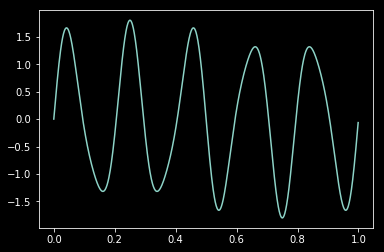

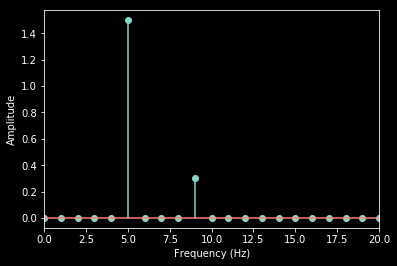

In [45]:
srate = 1000
t = np.arange(0., 1., 1/srate)
f1 = 5
f2 = 9
sig = 1.5*np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t)

plt.style.use('dark_background')
plt.plot(t, sig)
plt.show()

dft_coefs = np.zeros(len(sig), dtype=complex)

for i in range(0, srate):
    complex_sine = np.exp(-1j*2*np.pi*i*t)
    dft_coefs[i] = np.sum(np.multiply(complex_sine, sig))/srate
    
coefs = 2*np.abs(dft_coefs)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 20)
plt.stem(range(0, srate), coefs)
plt.show()

In [ ]:
srate = 1000
t = np.arange(0., 1., 1/srate)
f1 = 5
f2 = 9

# Since we're using the DFT, not just correlating with a sine wave,
# the 90 degree offset in the second sinusoidal component will not effect
# our calculated frequency domain values.
sig = 1.5*np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t+(np.pi/2))

plt.style.use('dark_background')
plt.plot(t, sig)
plt.show()

# This provides the complex coefficients we need
fcoeffs = np.fft.fft(sig) 

# Amplitude at each frequency is equal to the magnitude of each
# Fourier coefficient

# We mulitply by 2 since half of the ampitude is lost in the transform,
# and mulitply by the length of the signal, since the dot product doesn't
# normalize itself
amplitudes = 2*np.abs(frequency_domain/srate)

# Note that if you remove the limit from the plot, it shows DFT symmetry
plt.xlim(0, 20)
plt.stem(range(0, srate), freqs)
plt.show()


In [32]:
a = np.array([0.5, 0.5])
c = np.array([0.3, 0.3])
b = np.zeros(4)
np.concatenate([a, b])

array([0.5, 0.5, 0. , 0. , 0. , 0. ])

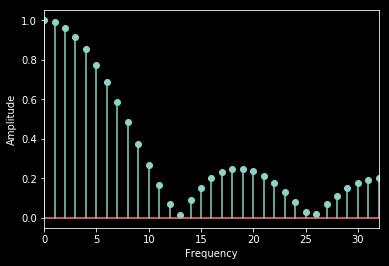

In [55]:
# Now let's make a filter

# These are the coefficients for a 5-tap, feed-forward (FIR) filter
filter_coeffs = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Pad the filter coefficients so we can take a 64-point DFT, instead
# of a puny 5-point one
padded_filter_coeffs = np.concatenate([filter_coeffs, np.zeros(59)]            )

dft_coeffs = np.fft.fft(padded_filter_coeffs)

filter_response = np.abs(dft_coeffs)

plt.stem(np.arange(len(filter_response)), filter_response)
plt.xlim(0, len(filter_response)/2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

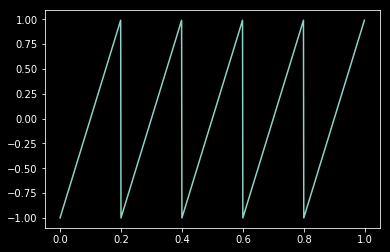

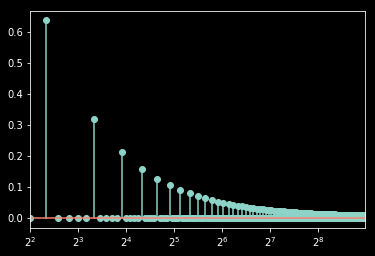

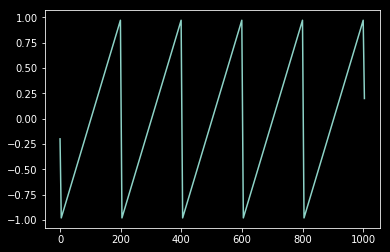

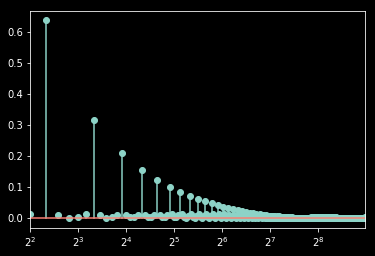

In [74]:
from scipy import convolve, signal

srate = 1000
t = np.arange(0., 1., 1/srate)

sig = scipy.signal.sawtooth(2*np.pi*5*t)
sig_fft = np.fft.fft(sig)

sig_amplitudes = 2*np.abs(sig_fft/srate)

filter_coeffs = [0.2, 0.2, 0.2, 0.2, 0.2]

filtered_signal = scipy.signal.convolve(sig, filter_coeffs)

flt_sig_fft = np.fft.fft(filtered_signal)
flt_sig_amps = 2*np.abs(flt_sig_fft/len(filtered_signal))

plt.plot(t, sig)
plt.show()

plt.stem(sig_amplitudes)
plt.xscale('log', basex=2)
plt.xlim(4, srate/2)
plt.show()

plt.plot(filtered_signal)
plt.show()

plt.stem(flt_sig_amps)
plt.xscale('log', basex=2)
plt.xlim(4, len(flt_sig_amps)/2)
plt.show()